# AVCAD Final Project - Analysis of livestock activities: geographical patterns
### Created by: Maria Dolgaya (28168) and Mariana Coelho (25605)
### Professor Pedro Segurado
### MSc in Green Data Science, ISA, Portugal

GitHub Repository: https://github.com/marianadc01/avcad-livestock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

Import the datasets:
1. 'table_with_codes.xlsx' that contains all necessary information for the analysis except for the names of regions
2. 'Regions.xlsx' that contains the codes and the names of NUTS3 regions of Portugal (can be downloaded [here](https://smi.ine.pt/Categoria))

In [2]:
df = pd.read_excel('table_with_codes.xlsx')
df.head()

C:\Users\acris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NutsID,code,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,...,olive_area,vineyards_area,other_permanent_crop_area,fresh_fruit_holdings,citrus_holdings,fruit_holdings,nuts_holdings,olive_holdings,vineyard_holdings,other_permanent_crop_holdings
0,111160101,111,160101,Aboim das ChoÃ§as,2019,15,61,11,7,34,...,0,12,0,0,1,0,1,0,32,0
1,111160101,111,160101,Aboim das ChoÃ§as,2009,30,57,4,4,50,...,0,9,0,0,0,0,0,0,29,0
2,111160101,111,160101,Aboim das ChoÃ§as,1999,49,73,7,6,62,...,0,14,0,0,0,0,0,0,40,0
3,111160101,111,160101,Aboim das ChoÃ§as,1989,167,97,4,0,163,...,0,28,0,0,0,0,0,1,84,0
4,111160102,111,160102,AguiÃ£,2019,24,68,5,2,70,...,1,15,0,0,0,0,0,2,39,0


In [3]:
regions = pd.read_excel('Regions.xlsx')
regions.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,Fonte: www.ine.pt – Sistema de metainformação,NaN,NaN
3,NaN,Exportação de categorias - Data de extração: 1...,NaN,NaN
4,NaN,NaN,NaN,NaN


### Preparation of the datasets

Dataset 1:

In [4]:
# Drop all null values and duplicates
df = df.dropna()
df = df.drop_duplicates()

In [5]:
# Filter the dataset and leave the columns that are necessary for the project
df_filter = df.iloc[:, 0:29]
df_filter.head()

,NutsID,code,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,...,livestock_cattle,livestock_pigs,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives,grassland_area,grassland_holdings
0,111160101,111,160101,Aboim das ChoÃ§as,2019,15,61,11,7,34,...,63,4,71,32,0,389,104,8,29,13
1,111160101,111,160101,Aboim das ChoÃ§as,2009,30,57,4,4,50,...,65,18,58,12,1,447,92,3,53,18
2,111160101,111,160101,Aboim das ChoÃ§as,1999,49,73,7,6,62,...,62,30,39,0,1,779,80,3,28,7
4,111160102,111,160102,AguiÃ£,2019,24,68,5,2,70,...,52,13,157,46,0,562,69,180,66,48
5,111160102,111,160102,AguiÃ£,2009,23,82,8,4,66,...,76,9,104,45,5,527,121,2,53,5


Dataset 2: 

In [6]:
# Drop the 1st column, the first 11 rows and use the new first row as headers
regions = regions.iloc[11:, 1:]
regions.reset_index(drop=True, inplace=True)
regions.columns = regions.iloc[0]
regions = regions[1:]
regions.head()

,Nivel,Code,Designation
1,1,PT,Portugal
2,2,1,Continente
3,3,11,Norte
4,4,111,Alto Minho
5,4,112,Cávado


Merge the main dataset with the regions, so it has a new column called 'Designation' - after that the dataset can be used for the analysis

In [7]:
df_merged = pd.merge(df_filter, regions[['Code', 'Designation']], left_on='code', right_on='Code', how='left')
df_merged.head()

,NutsID,code,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,...,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives,grassland_area,grassland_holdings,Code,Designation
0,111160101,111,160101,Aboim das ChoÃ§as,2019,15,61,11,7,34,...,71,32,0,389,104,8,29,13,111,Alto Minho
1,111160101,111,160101,Aboim das ChoÃ§as,2009,30,57,4,4,50,...,58,12,1,447,92,3,53,18,111,Alto Minho
2,111160101,111,160101,Aboim das ChoÃ§as,1999,49,73,7,6,62,...,39,0,1,779,80,3,28,7,111,Alto Minho
3,111160102,111,160102,AguiÃ£,2019,24,68,5,2,70,...,157,46,0,562,69,180,66,48,111,Alto Minho
4,111160102,111,160102,AguiÃ£,2009,23,82,8,4,66,...,104,45,5,527,121,2,53,5,111,Alto Minho


In [8]:
# Define the columns you need
columns_to_keep = ['Designation', 'year','edu_none','edu_basic','edu_secondary','edu_superior','livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats', 'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives' ]

# Subset the DataFrame
data = df_merged[columns_to_keep]

data.head()

,Designation,year,edu_none,edu_basic,edu_secondary,edu_superior,livestock_cattle,livestock_pigs,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives
0,Alto Minho,2019,15,61,11,7,63,4,71,32,0,389,104,8
1,Alto Minho,2009,30,57,4,4,65,18,58,12,1,447,92,3
2,Alto Minho,1999,49,73,7,6,62,30,39,0,1,779,80,3
3,Alto Minho,2019,24,68,5,2,52,13,157,46,0,562,69,180
4,Alto Minho,2009,23,82,8,4,76,9,104,45,5,527,121,2


## 2. How these types of livestock are related with the geographical patterns of socio-economic indicators?

Check normality of the levels of education

In [9]:
from scipy.stats import shapiro

# Assuming data is your DataFrame
# Select education level columns
education_levels = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

for edu_level in education_levels:
    stat, p = shapiro(data[edu_level])
    print(f'Shapiro-Wilk Test for {edu_level}:')
    print('Statistics=%.3f, p=%.6f' % (stat, p))
    
    # Check for normality using a significance level of 0.05
    alpha = 0.05
    if p > alpha:
        print('Fail to reject H0. The distribution seems normal.')
    else:
        print('Reject H0. The distribution does not seem normal.')

Shapiro-Wilk Test for edu_none:
Statistics=0.702, p=0.000000
Reject H0. The distribution does not seem normal.
Shapiro-Wilk Test for edu_basic:
Statistics=0.778, p=0.000000
Reject H0. The distribution does not seem normal.
Shapiro-Wilk Test for edu_secondary:
Statistics=0.773, p=0.000000
Reject H0. The distribution does not seem normal.
Shapiro-Wilk Test for edu_superior:
Statistics=0.740, p=0.000000
Reject H0. The distribution does not seem normal.


C:\Users\acris\AppData\Local\Temp\ipykernel_9628\3611040443.py:8: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8544.
  stat, p = shapiro(data[edu_level])


Plot the distributions of populations with different levels of education

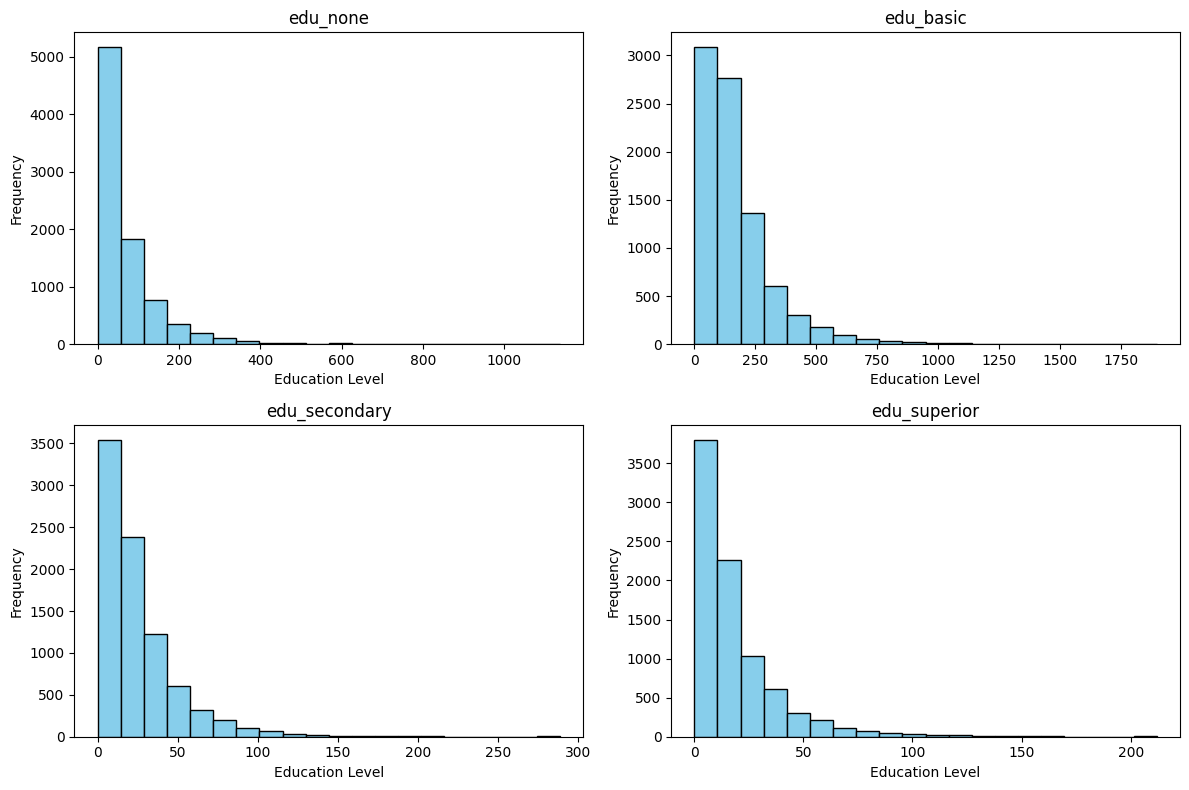

In [10]:
plt.figure(figsize=(12, 8))
for i, edu_level in enumerate(education_levels, 1):
    plt.subplot(2, 2, i)
    plt.hist(data[edu_level], bins=20, color='skyblue', edgecolor='black')
    plt.title(edu_level)
    plt.xlabel('Education Level')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Transform the data so it groups the values by NUTS3 regions

In [11]:
df_region = data.groupby('Designation').sum()
df_region.head()

,year,edu_none,edu_basic,edu_secondary,edu_superior,livestock_cattle,livestock_pigs,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives
Designation,,,,,,,,,,,,,
Alentejo Central,409846,12042,31672,7381,7061,599391,576654,1076380,88156,8594,1040471,8104,54904
Alentejo Litoral,182839,9547,17360,2998,2424,226299,464430,428710,39596,4132,1411609,11419,44750
Algarve,401810,27504,60353,9900,6944,29468,105794,153493,52292,7832,347730,19709,191286
Alto Alentejo,415863,14767,34661,6480,6007,426273,82602,883293,74032,7862,176593,51307,45393
Alto Minho,1253616,37236,71880,9765,5713,95992,18540,142584,44779,10436,1470435,239457,30567


Use chi-squared test to check the null hypothesis and see if there is any association between categorical values

In [12]:
from scipy.stats import chi2_contingency

# Null Hypothesis Proportions of education levels are independent of the proportions of livestock types across regions.

edu_cols = ['edu_basic', 'edu_secondary', 'edu_superior']  
df_region_proportions = df_region[edu_cols].div(df_region[edu_cols].sum(axis=1), axis=0)

# Calculate proportion of people with no education
df_region_proportions['edu_none'] = df_region['edu_none'] / df_region.sum(axis=1)

# Calculate row-wise proportions for livestock types
df_region_proportions['total_livestock'] = df_region.drop(columns=['edu_none']).sum(axis=1)
df_region_proportions = df_region_proportions.div(df_region_proportions['total_livestock'], axis=0)
df_region_proportions.drop(columns=['total_livestock'], inplace=True)

# Chi-square test
chi2, p, _, _ = chi2_contingency(df_region_proportions)

print("Chi-square statistic:", chi2)
print("p-value:", p)

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df_region_proportions)

# Reset display options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Chi-square statistic: 8.400141668268779e-08
p-value: 1.0
                                 edu_basic  edu_secondary  edu_superior  \
Designation                                                               
Alentejo Central              1.757195e-07   4.095054e-08  3.917515e-08   
Alentejo Litoral              2.686365e-07   4.639241e-08  3.751007e-08   
Algarve                       5.638243e-07   9.248688e-08  6.487161e-08   
Alto Alentejo                 3.325934e-07   6.217954e-08  5.764082e-08   
Alto Minho                    2.424509e-07   3.293729e-08  1.926992e-08   
Alto Tâmega                   4.027826e-07   4.885605e-08  2.975681e-08   
Ave                           2.180315e-07   2.810874e-08  2.131752e-08   
Baixo Alentejo                2.486300e-07   4.990344e-08  4.180265e-08   
Beira Baixa                   3.290308e-07   5.565692e-08  4.740107e-08   
Beiras e Serra da Estrela     1.713057e-07   2.421394e-08  2.056308e-08   
Cávado                        2.217115e-07 

Since the p-value is very high, we fail to reject the null hypothesis.

This suggests that there's no significant association between education levels and livestock types across regions.
The chi-square test didn't find evidence to support the idea that the proportions of education levels and livestock types are related in a meaningful way across the regions.


Create new dataframes (one for education and one for livestock) to see how they interact

In [13]:
# Convert all columns to numeric, forcing any errors to NaN (then dropping them)
for col in columns_to_keep:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values that were caused by conversion errors
data = data.dropna()

# Normalize the data
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

C:\Users\acris\AppData\Local\Temp\ipykernel_9628\2799299645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')


In [14]:
# Define the columns you need
columns_to_keep = ['Designation', 'year','edu_none','edu_basic','edu_secondary','edu_superior',
                   'livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats', 
                   'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives']

In [15]:
# Subset the DataFrame
data = df_merged[columns_to_keep]

data.head()

,Designation,year,edu_none,edu_basic,edu_secondary,edu_superior,livestock_cattle,livestock_pigs,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives
0,Alto Minho,2019,15,61,11,7,63,4,71,32,0,389,104,8
1,Alto Minho,2009,30,57,4,4,65,18,58,12,1,447,92,3
2,Alto Minho,1999,49,73,7,6,62,30,39,0,1,779,80,3
3,Alto Minho,2019,24,68,5,2,52,13,157,46,0,562,69,180
4,Alto Minho,2009,23,82,8,4,76,9,104,45,5,527,121,2


In [16]:
# Create two dataframes
education_columns = ['Designation', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
livestock_columns = ['Designation', 'livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats', 
                     'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives']

Dataframe for education levels:

In [17]:
df_education = data[education_columns]
df_education.head()

,Designation,edu_none,edu_basic,edu_secondary,edu_superior
0,Alto Minho,15,61,11,7
1,Alto Minho,30,57,4,4
2,Alto Minho,49,73,7,6
3,Alto Minho,24,68,5,2
4,Alto Minho,23,82,8,4


Dataframe for livestock types:

In [18]:
df_livestock = data[livestock_columns]
df_livestock.head()

,Designation,livestock_cattle,livestock_pigs,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives
0,Alto Minho,63,4,71,32,0,389,104,8
1,Alto Minho,65,18,58,12,1,447,92,3
2,Alto Minho,62,30,39,0,1,779,80,3
3,Alto Minho,52,13,157,46,0,562,69,180
4,Alto Minho,76,9,104,45,5,527,121,2


Check some summary statistics for livestock: 

In [19]:
# Descriptive Analysis
summary_stats_livestock = df_livestock.describe()
print(summary_stats_livestock)

       livestock_cattle  livestock_pigs  livestock_sheep  livestock_goats  \
count       8544.000000     8544.000000      8544.000000      8544.000000   
mean         426.382257      742.909527       853.810627       150.278675   
std         1168.609909     5031.522471      2260.333069       302.156875   
min            0.000000        0.000000         0.000000         0.000000   
25%           15.000000        7.000000        57.000000         9.000000   
50%           92.000000       27.000000       214.000000        42.000000   
75%          313.000000      112.000000       671.000000       154.250000   
max        27864.000000   218151.000000     38308.000000      4454.000000   

       livestock_equidae  livestock_poultry  livestock_rabbits  \
count        8544.000000       8.544000e+03        8544.000000   
mean           21.272238       1.511776e+04         485.351241   
std            38.099350       9.169048e+04        2355.777484   
min             0.000000       0.000000e+0

Check some summary statistics for education: 

In [20]:
# Descriptive Analysis
summary_stats_education = df_education.describe()
print(summary_stats_education)

          edu_none    edu_basic  edu_secondary  edu_superior
count  8544.000000  8544.000000    8544.000000   8544.000000
mean     69.516386   171.247425      25.325726     18.619850
std      84.532547   157.662701      25.296663     20.680219
min       0.000000     0.000000       0.000000      0.000000
25%      18.000000    70.000000       9.000000      5.000000
50%      42.000000   126.500000      18.000000     12.000000
75%      89.000000   220.250000      33.000000     24.000000
max    1137.000000  1899.000000     289.000000    212.000000


Create a Correlation Matrix to better visualize the connections between the variables:

Correlation Matrix between Education and Livestock:
               livestock_cattle  livestock_pigs  livestock_sheep  \
edu_none               0.111965        0.111289         0.202441   
edu_basic              0.182061        0.161744         0.223919   
edu_secondary          0.253326        0.174214         0.315333   
edu_superior           0.278773        0.126947         0.363700   

               livestock_goats  livestock_equidae  livestock_poultry  \
edu_none              0.354643           0.391929           0.081270   
edu_basic             0.319326           0.324553           0.146278   
edu_secondary         0.294269           0.278250           0.128519   
edu_superior          0.248190           0.245114           0.055224   

               livestock_rabbits  livestock_hives  
edu_none                0.132459         0.127128  
edu_basic               0.152752         0.208504  
edu_secondary           0.102241         0.326320  
edu_superior            0.062027      

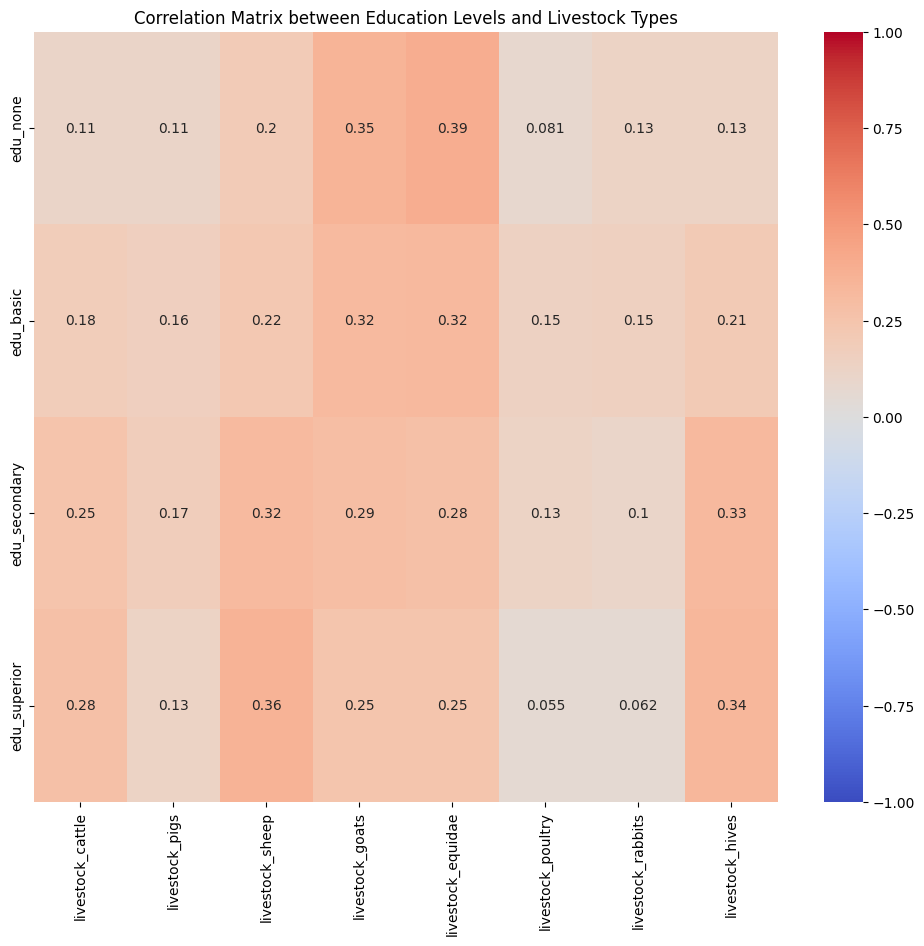

In [21]:
# Compute the correlation matrix between the two dataframes
correlation_matrix = pd.DataFrame(index=df_education.columns[1:], columns=df_livestock.columns[1:])

for edu_col in df_education.columns[1:]:
    for live_col in df_livestock.columns[1:]:
        correlation_matrix.loc[edu_col, live_col] = df_education[edu_col].corr(df_livestock[live_col])

# Convert the correlation matrix to numeric type
correlation_matrix = correlation_matrix.astype(float)

# Display the correlation matrix
print("Correlation Matrix between Education and Livestock:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Education Levels and Livestock Types')
plt.show()

Summary: no significant relation between a level of education and type of livestock being produced is noticeble (aligns with the Chi-Square test results)

Create a Regression Analysis, using Linear Regression and OLS:

In [22]:
from sklearn.linear_model import LinearRegression

X = data[['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']]  # Independent variable(s)
y = data[['livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats', 'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives']]  # Dependent variable(s)
regression_results = {}

for livestock in y.columns:
    model = LinearRegression()
    model.fit(X, y[livestock])
    regression_results[livestock] = model.coef_

print("Regression Results using sklearn:")
for livestock, coef in regression_results.items():
    print(f"{livestock}: {coef}")

Regression Results using sklearn:
livestock_cattle: [ 0.9838219  -0.65301486  3.89209745 13.5152187 ]
livestock_pigs: [ -1.13962036   2.24626818  36.92200541 -16.57020892]
livestock_sheep: [ 9.55000459 -5.81666518 10.34269635 44.22117713]
livestock_goats: [ 1.56325836 -0.47192697  1.91703952  1.91119941]
livestock_equidae: [ 0.24424558 -0.07306899  0.11274034  0.3752207 ]
livestock_poultry: [-173.77845887  153.42075864  615.1383716  -893.04981561]
livestock_rabbits: [-0.29913939  2.98801911 -1.56751294 -4.70905345]
livestock_hives: [ 0.61048963 -0.62399428  4.18813853  4.43886057]


In [23]:
# OLS Regression Analysis using statsmodels
ols_results = {}
for livestock in y.columns:
    X_ols = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.OLS(data[livestock], X_ols).fit()
    ols_results[livestock] = model.summary()
    print(f"OLS Regression Results for {livestock}:\n", model.summary())

OLS Regression Results for livestock_cattle:
                             OLS Regression Results                            
Dep. Variable:       livestock_cattle   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     185.5
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          1.09e-152
Time:                        13:32:31   Log-Likelihood:                -72118.
No. Observations:                8544   AIC:                         1.442e+05
Df Residuals:                    8539   BIC:                         1.443e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------


Accessing a specific livestock type's summary

In [24]:
# Just change the type of livestock in the brakets to the one desired and adapt the summary variable 
# For example, hives
hives_summary = ols_results['livestock_hives']
print("OLS Regression Summary for hives:\n", hives_summary)

OLS Regression Summary for hives:
                             OLS Regression Results                            
Dep. Variable:        livestock_hives   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     316.7
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          1.72e-254
Time:                        13:32:31   Log-Likelihood:                -62783.
No. Observations:                8544   AIC:                         1.256e+05
Df Residuals:                    8539   BIC:                         1.256e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const      

Perform One-Way ANOVA Tests on all types of education:

H0: There is no difference in means of populations with no education across different regions

In [25]:
import pandas as pd
from scipy.stats import f_oneway


education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

df_long_edu = pd.melt(df_merged, id_vars=['year', 'Designation'], 
                      value_vars=education_columns, 
                      var_name='Education_Level', value_name='Population')
print(df_long_edu.head())

# Perform ANOVA
anova_results = {}
for education_level in df_long_edu['Education_Level'].unique():
    groups = [df_long_edu['Population'][(df_long_edu['Designation'] == region) & 
                                        (df_long_edu['Education_Level'] == education_level)].values 
              for region in df_long_edu['Designation'].unique()]
    stat, p = f_oneway(*groups)
    anova_results[education_level] = {'F-statistics': stat, 'p-value': p}

    print(f"\n{education_level.capitalize()}:")
    print('F-statistics=%.3f, p=%.6f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Fail to reject H0. Rejecting H0 has an error probability > 0.05')
    else:
        print('Reject H0 with an error probability < 0.05')

   year Designation Education_Level  Population
0  2019  Alto Minho        edu_none          15
1  2009  Alto Minho        edu_none          30
2  1999  Alto Minho        edu_none          49
3  2019  Alto Minho        edu_none          24
4  2009  Alto Minho        edu_none          23

Edu_none:
F-statistics=27.433, p=0.000000
Reject H0 with an error probability < 0.05

Edu_basic:
F-statistics=51.988, p=0.000000
Reject H0 with an error probability < 0.05

Edu_secondary:
F-statistics=64.857, p=0.000000
Reject H0 with an error probability < 0.05

Edu_superior:
F-statistics=68.317, p=0.000000
Reject H0 with an error probability < 0.05


Summary: all null hypothesis were rejected because the p-values are very low

Perform a Principal Component Analysis (PCA):

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

scaler = StandardScaler()
data_scaled_numeric = scaler.fit_transform(data[numeric_columns])

data_scaled_numeric = pd.DataFrame(data=data_scaled_numeric, columns=numeric_columns)

data_scaled = pd.concat([data[non_numeric_columns].reset_index(drop=True), data_scaled_numeric], axis=1)

data_scaled.head()

,Designation,year,edu_none,edu_basic,edu_secondary,edu_superior,livestock_cattle,livestock_pigs,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives
0,Alto Minho,1.221705,-0.644954,-0.699302,-0.566342,-0.561915,-0.310971,-0.146865,-0.346346,-0.391471,-0.558369,-0.160645,-0.161889,-0.320798
1,Alto Minho,-0.003585,-0.467497,-0.724674,-0.843075,-0.706990,-0.309259,-0.144082,-0.352097,-0.457665,-0.532120,-0.160012,-0.166983,-0.333212
2,Alto Minho,-1.228876,-0.242718,-0.623186,-0.724475,-0.610273,-0.311827,-0.141697,-0.360504,-0.497382,-0.532120,-0.156391,-0.172077,-0.333212
3,Alto Minho,1.221705,-0.538480,-0.654901,-0.803541,-0.803706,-0.320384,-0.145076,-0.308296,-0.345135,-0.558369,-0.158758,-0.176747,0.106223
4,Alto Minho,-0.003585,-0.550310,-0.566099,-0.684942,-0.706990,-0.299846,-0.145871,-0.331745,-0.348444,-0.427125,-0.159140,-0.154672,-0.335694


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate the 'Designation' column from the rest of the data
designation = data['Designation']
data_numeric = data.drop(columns=['Designation'])

# Apply StandardScaler to the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data=data_scaled, columns=data_numeric.columns)

In [28]:
# Perform PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(data_scaled)
pca_continuous = pd.DataFrame(data=PC, columns=['PC1', 'PC2'])
pca_continuous.head()

,PC1,PC2
0,-1.626799,0.822585
1,-1.659551,-0.122442
2,-1.360055,-0.992453
3,-1.654511,0.799847
4,-1.487405,-0.103811


In [29]:
def biplot(score,coef,labels=None): 
 
    xs = score[:,0] # PC1 object scores
    ys = score[:,1] # PC2 object scores 
    n = coef.shape[0] # number of dimensions (2)
    scalex = 1.0/(xs.max() - xs.min()) # to rescale scores
    scaley = 1.0/(ys.max() - ys.min()) # to rescale scores
    plt.scatter(xs * scalex,ys * scaley,
                s=6, 
                color='blue') # scatter plot using rescaled object scores
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'red',
                  head_width=0.01,
                  alpha = 0.5) # plot arrows for each variable
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'red', 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
    plt.figure()

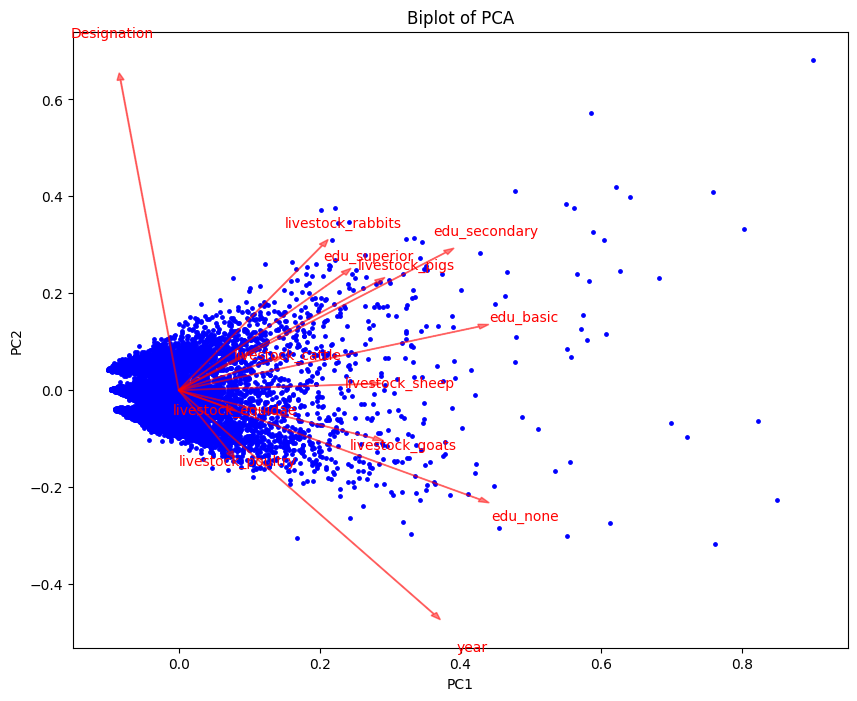

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       list(data.columns))
plt.show()

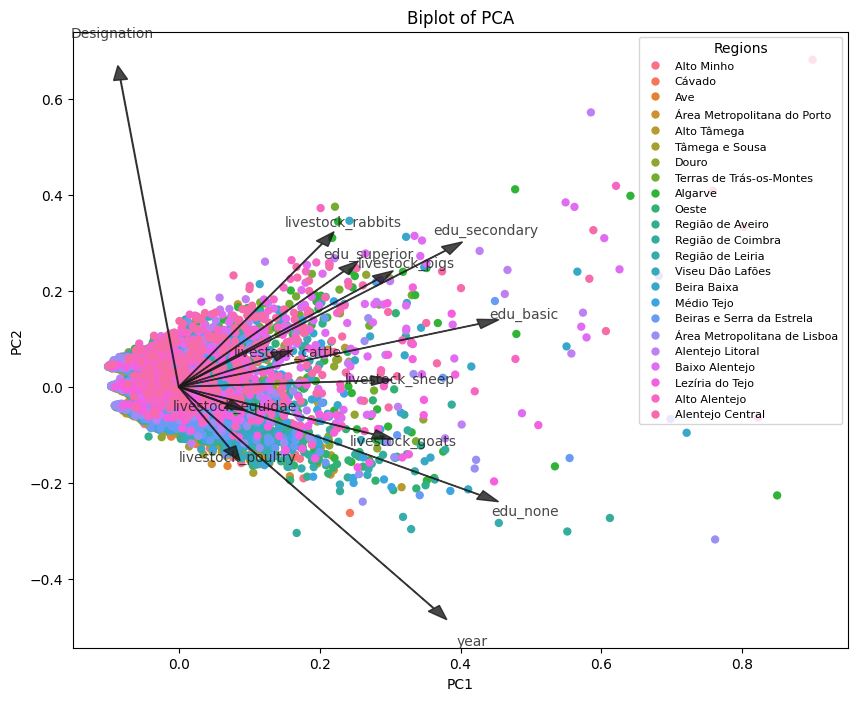

In [35]:
# a biplot with ‘Designation’ as a grouping variable

PC1 = pca_continuous['PC1']/(pca_continuous['PC1'].max() - pca_continuous['PC1'].min())
PC2 = pca_continuous['PC2']/(pca_continuous['PC2'].max() - pca_continuous['PC2'].min())

plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
sns.scatterplot(x=PC1,
              y=PC2,
              hue = data['Designation'],
              linewidth=0,
              )

n = np.transpose(pca.components_).shape[0] # number of dimensions (2)
for i in range(n):
        plt.arrow(0, 0, np.transpose(pca.components_)[i,0], 
                  np.transpose(pca.components_)[i,1], 
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) # plot arrows for each variable
        plt.text(np.transpose(pca.components_)[i,0]* 1.15, 
                 np.transpose(pca.components_)[i,1] * 1.15, 
                 list(data.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
plt.legend(title='Regions', fontsize=8)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))

plt.show()

Summary: From the PCA, we can observe the majority of the data points are similar to each other (data can be homogeneous).

Perform Hierarchical Clustering:

Use 'data' dataframe (previously established)

In [ ]:
columns_to_keep = ['Designation', 'year', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior',
                   'livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats', 
                   'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives']

data = df_merged[columns_to_keep]

In [ ]:
education_levels = data.groupby(['Designation', 'year'])[['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']].sum().reset_index()
livestock_types = data.groupby(['Designation', 'year'])[['livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats', 
                                                         'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives']].sum().reset_index()

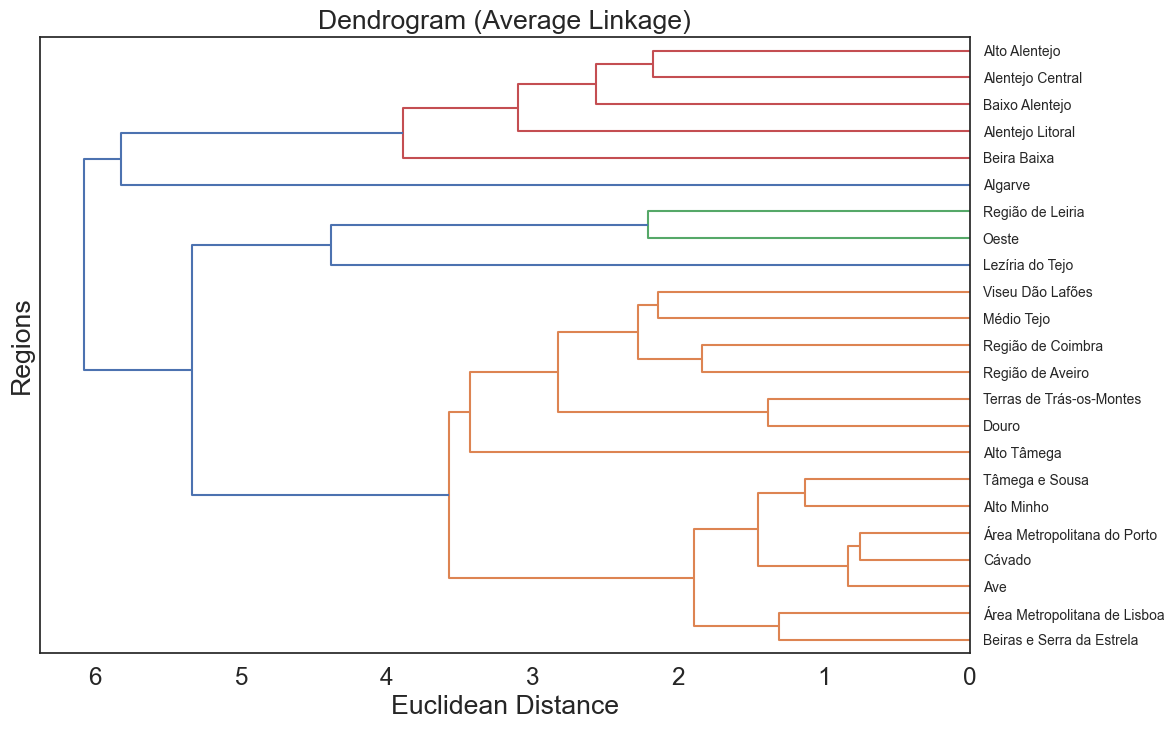

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Group by Designation and average the values over the years
data_aggregated = data.groupby('Designation').mean().reset_index()

# Remove non-numeric columns for clustering
data_numeric = data_aggregated.drop(['Designation', 'year'], axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform agglomerative clustering with average linkage
linkage_average = linkage(data_scaled, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram_plot = dendrogram(linkage_average, labels=data_aggregated['Designation'].values, orientation='left')
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Euclidean Distance')
plt.ylabel('Regions')
plt.show()

Summary:  this cluster shows how regions are similar among them based on education and livestock. Four visible groups with similarities among them (orange, blue, red and green).

Create a PairGrid to see if there's any correlation between the level of education and the production of livestock:

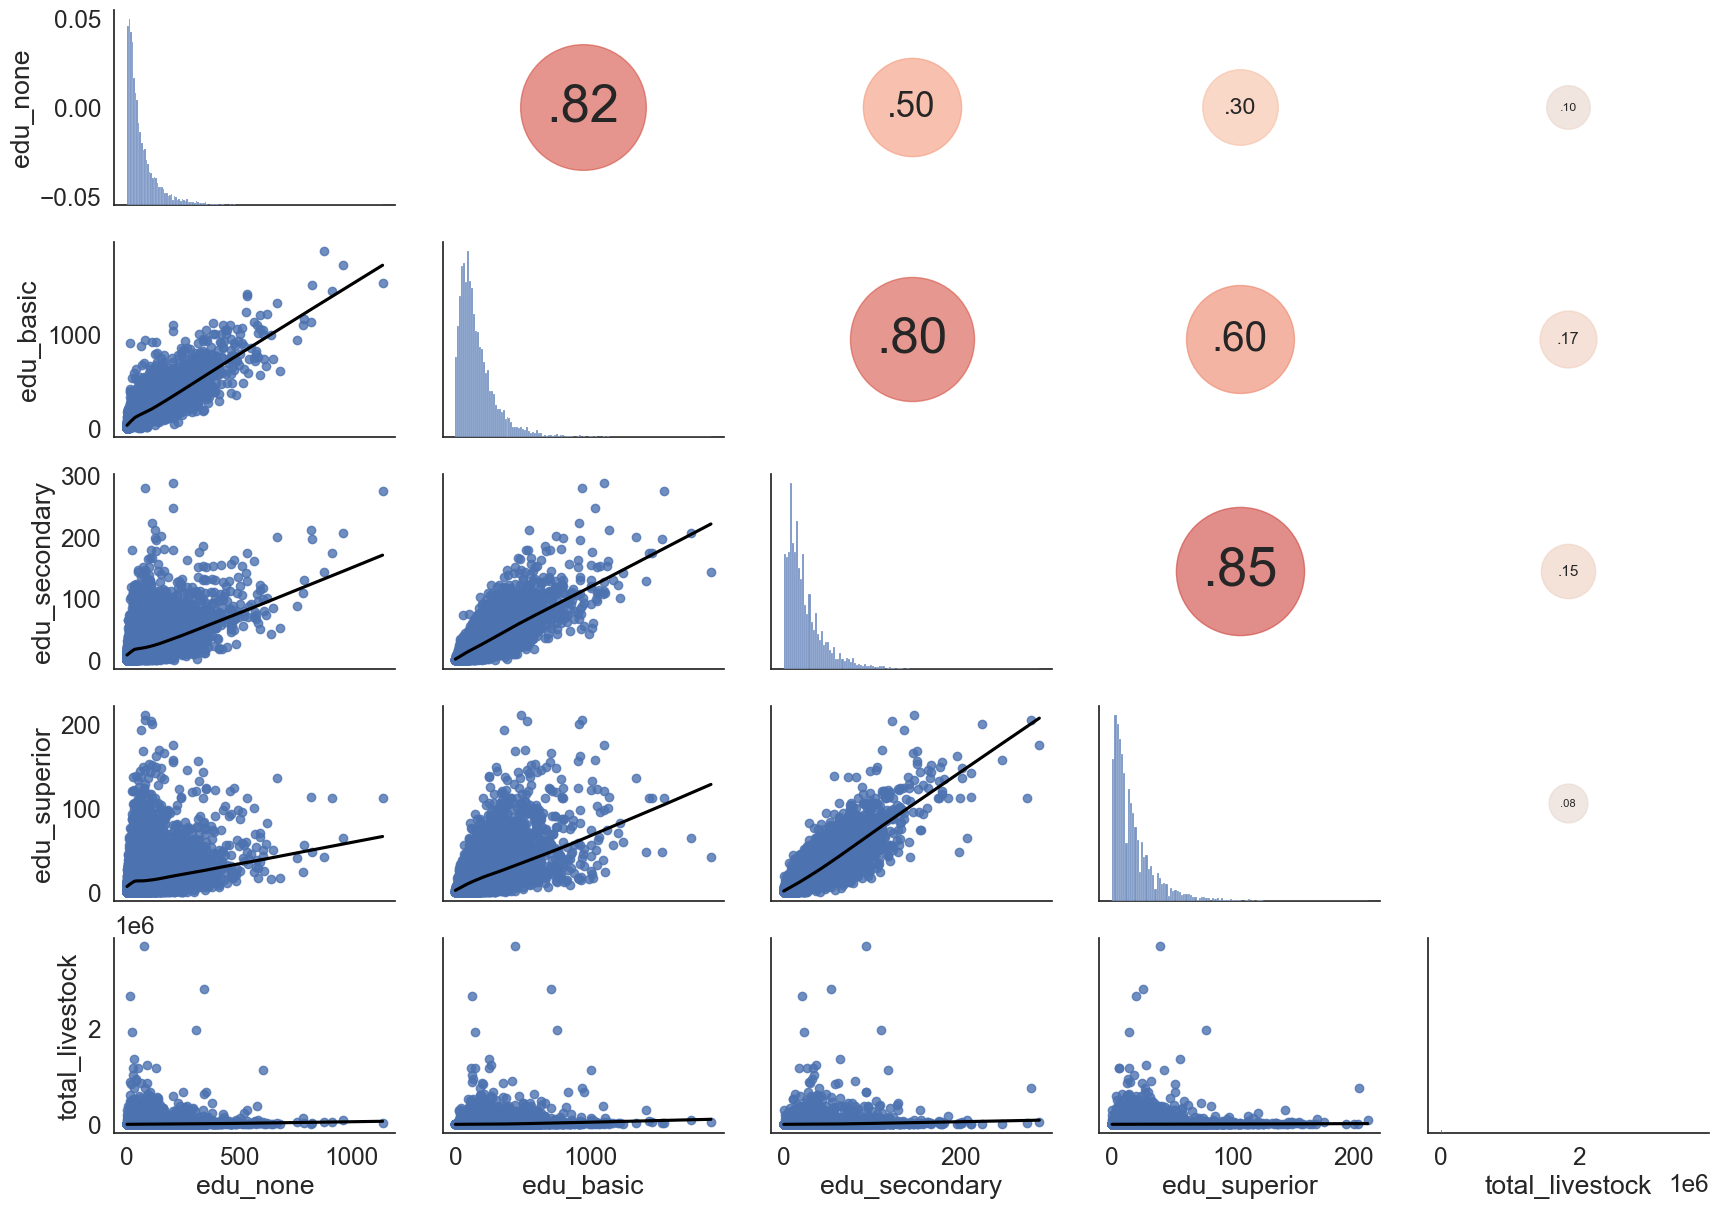

In [ ]:
livestock_columns = [
    'livestock_cattle', 'livestock_pigs', 'livestock_sheep', 
    'livestock_goats', 'livestock_equidae', 'livestock_poultry',
    'livestock_rabbits', 'livestock_hives'
]

# Calculate the total livestock and add it as a new column
df_merged['total_livestock'] = df_merged[livestock_columns].sum(axis=1)
columns_to_keep = ['Designation','edu_none','edu_basic','edu_secondary','edu_superior', 'total_livestock']

# Subset the DataFrame
data = df_merged[columns_to_keep]

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(data, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

Summary: no correlation was detected

Create barplots showing the comparison between the levels of education/types of livestock among regions:

C:\Users\acris\AppData\Local\Temp\ipykernel_10816\2099093408.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Category', y='Value', hue='Designation', data=df_melted, palette=palette,  ci=None)


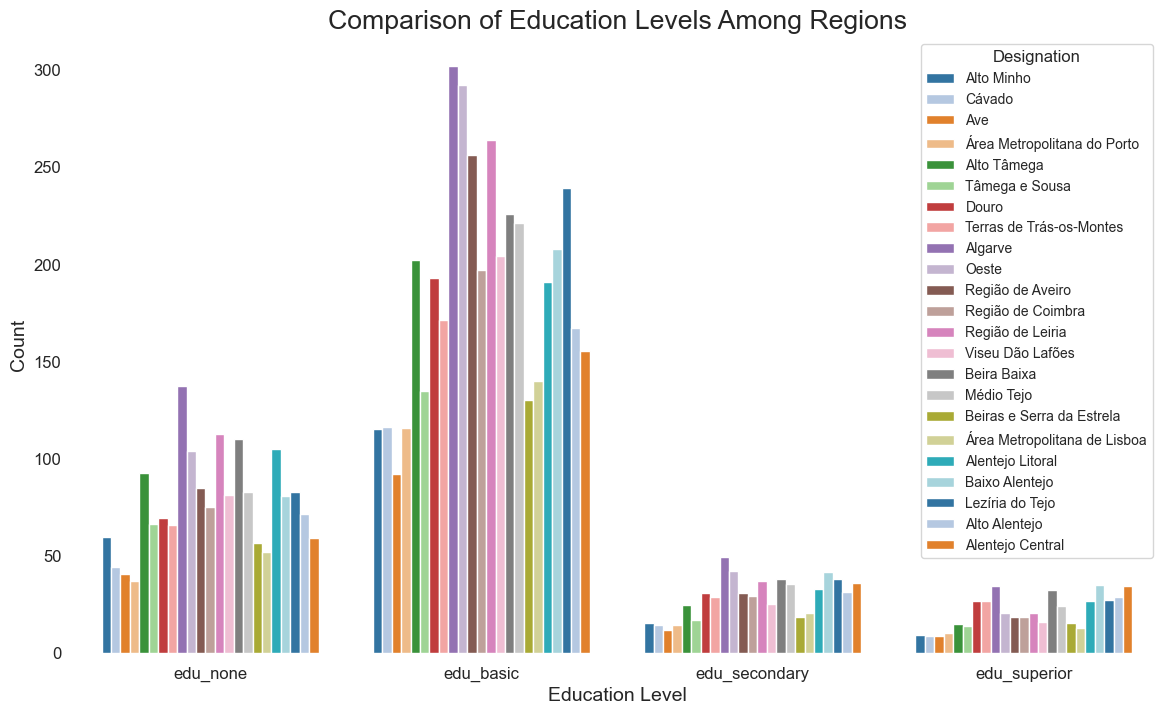

In [ ]:
# Function to plot bar plots
def plot_barplots(df, title):
    df_melted = df.melt(id_vars='Designation', var_name='Category', value_name='Value')
    plt.figure(figsize=(14, 8))
    
    palette = sns.color_palette("tab20", len(df['Designation'].unique()))
    
    ax = sns.barplot(x='Category', y='Value', hue='Designation', data=df_melted, palette=palette,  ci=None)
    plt.title(title)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Education Level', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(loc='best', fontsize=10, title='Designation', title_fontsize=12)
    sns.despine(left=True, bottom=True)
    plt.show()

plot_barplots(df_education, 'Comparison of Education Levels Among Regions')    

<Figure size 2000x800 with 0 Axes>

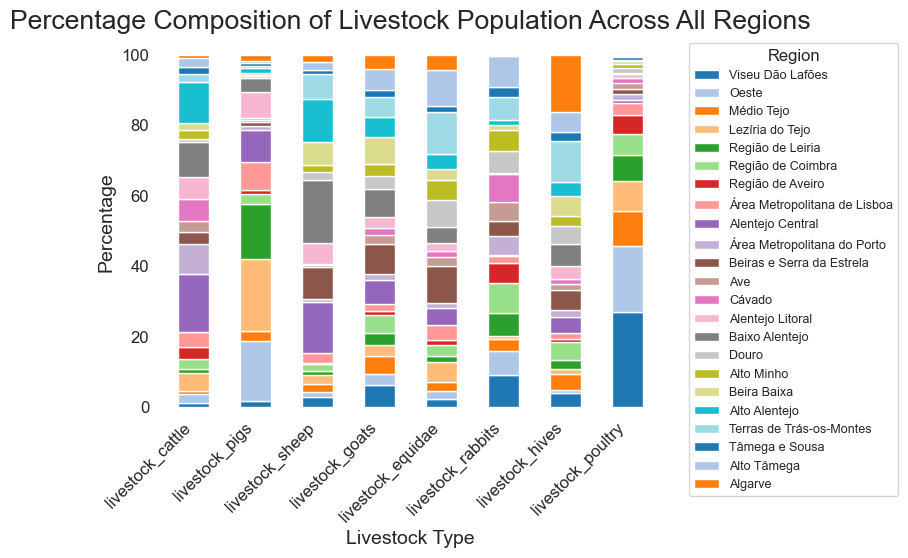

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

livestock_columns = [
    'livestock_cattle', 'livestock_pigs', 'livestock_sheep', 
    'livestock_goats', 'livestock_equidae',
    'livestock_rabbits', 'livestock_hives', 'livestock_poultry'
]

df_grouped = df_merged.groupby('Designation')[livestock_columns].sum()
df_grouped['Total'] = df_grouped.sum(axis=1)
df_grouped_sorted = df_grouped.sort_values(by='Total', ascending=False)
df_grouped_sorted.drop(columns=['Total'], inplace=True)
df_grouped_percentage = df_grouped_sorted.div(df_grouped_sorted.sum(axis=0), axis=1) * 100

plt.figure(figsize=(20, 8))
palette = sns.color_palette("tab20", len(df_grouped_percentage.index))
ax = df_grouped_percentage.T.plot(kind='bar', stacked=True, color=palette)

plt.title('Percentage Composition of Livestock Population Across All Regions')
plt.xlabel('Livestock Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), fontsize=9, loc='upper left', title_fontsize=12)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.show()

Create a time series showing the trends for level of education and type of livestock withing the regions from 1989 to 2019:

Using the 'data' dataframe again, we need to ensure 'year' is treated as an integer

In [ ]:
data['year'] = data['year'].astype(int)

C:\Users\acris\AppData\Local\Temp\ipykernel_10816\2305003562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['year'].astype(int)


In [ ]:
# Function to plot time series
def plot_time_series(df, title):
    df_melted = df.melt(id_vars=['Designation', 'year'], var_name='Category', value_name='Value')
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='year', y='Value', hue='Category', data=df_melted, marker='o')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(loc='best', title='Category')
    plt.grid(True)
    
    # Ensure x-axis is set to integer ticks only
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.show()

Plot education levels over time

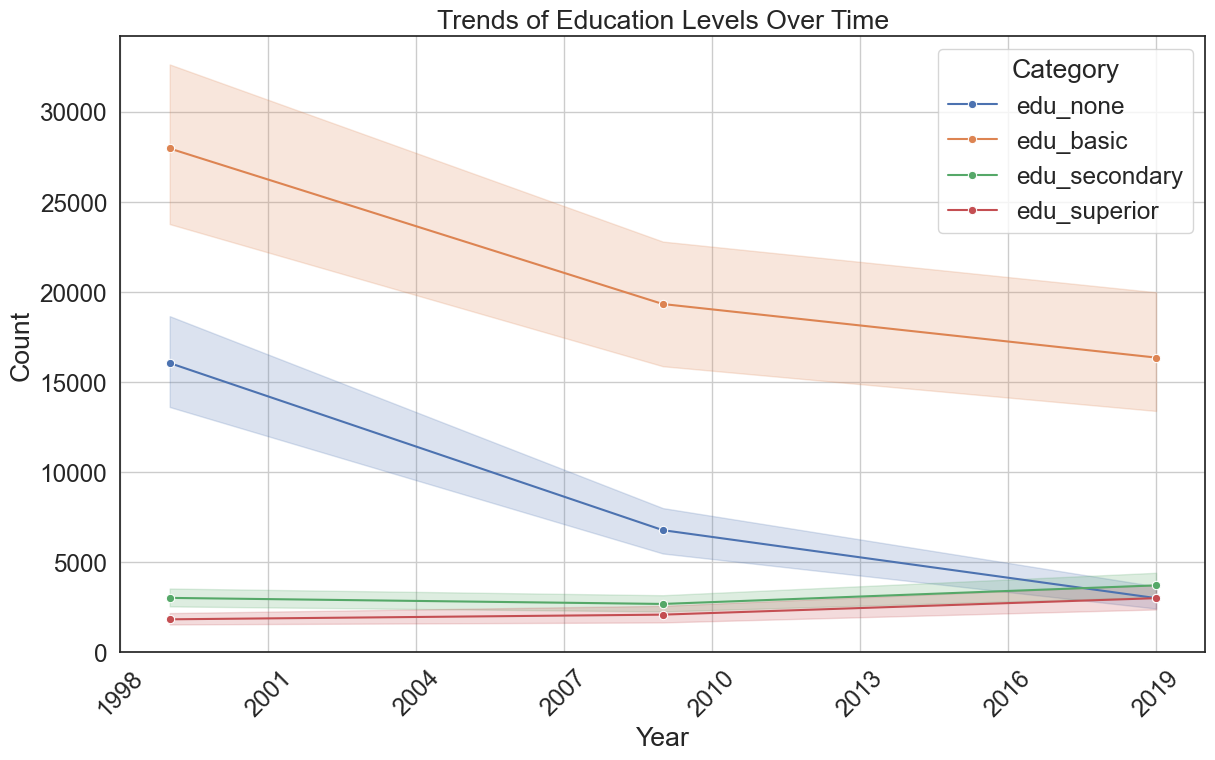

In [ ]:
plot_time_series(education_levels, 'Trends of Education Levels Over Time')

Plot livestock types over time

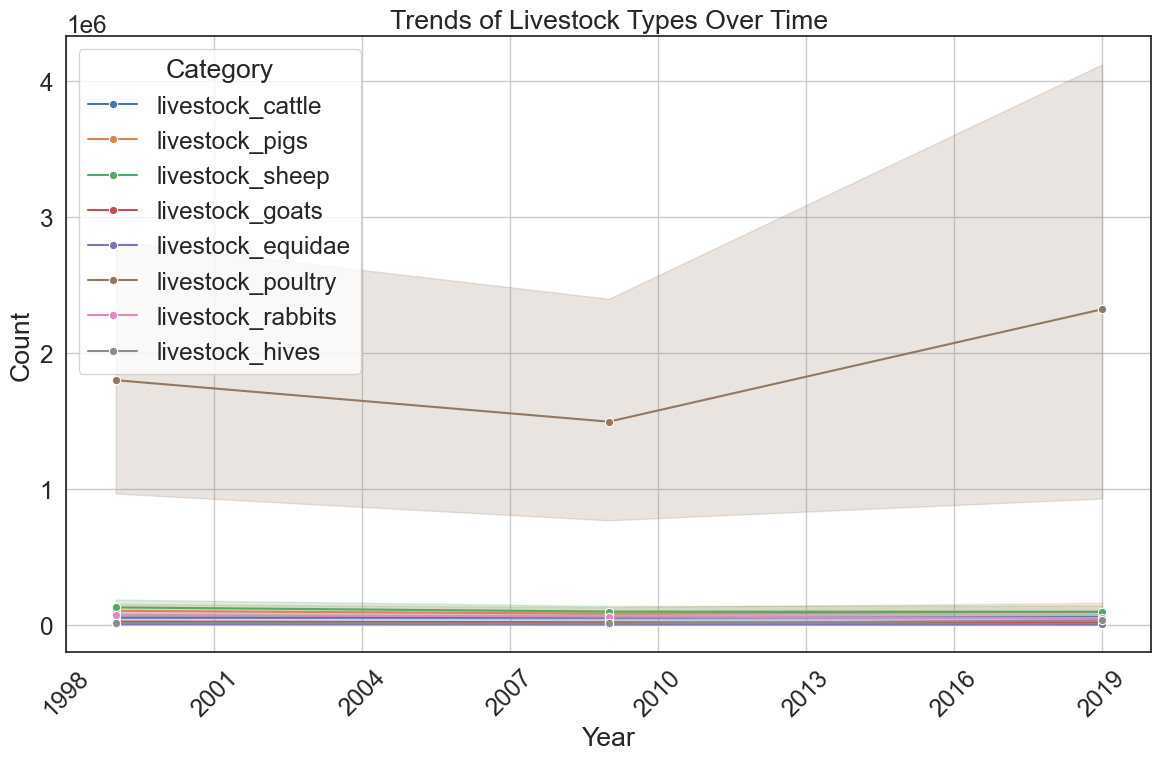

In [ ]:
plot_time_series(livestock_types, 'Trends of Livestock Types Over Time')

Summary: Basic education is the most common level, followed up by no education. Poultry is the most commom livestock type.

Show the most common livestock types across different regions:

Repaste df_long from Objective 1:

In [ ]:
# Transform the dataframe so it is suitable for the analysis

df_long = pd.melt(df_merged, id_vars=['year', 'Designation'], 
                  value_vars=['livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats', 'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives'], 
                  var_name='Livestock_Type', value_name='Population')
print(df_long.head())

   year Designation    Livestock_Type  Population
0  2019  Alto Minho  livestock_cattle          63
1  2009  Alto Minho  livestock_cattle          65
2  1999  Alto Minho  livestock_cattle          62
3  2019  Alto Minho  livestock_cattle          52
4  2009  Alto Minho  livestock_cattle          76


Create a map showing the most common livestock type per region:

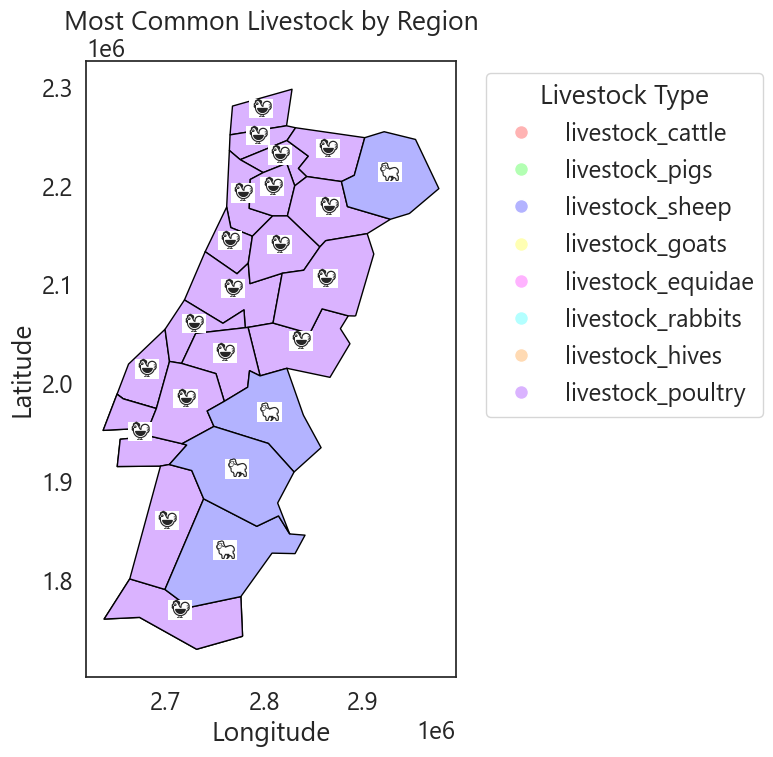

In [ ]:
import matplotlib.font_manager as fm
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Assuming 'df_long' and 'df_grouped' are already defined and contain the relevant data.

# Filter regions in portugal_regions that are present in df_long
regions_to_plot = df_long['Designation'].unique()
portugal_regions = gpd.read_file("NUTS_RG_60M_2013_3035.geojson")
portugal_regions_filtered = portugal_regions[portugal_regions['NUTS_NAME'].isin(regions_to_plot)]

# Merge livestock data with region boundaries
merged_data = portugal_regions_filtered.merge(df_grouped, left_on='NUTS_NAME', right_index=True)

# Define the dictionary for livestock emoji codes
livestock_emoji_codes = {
    'livestock_cattle': '🐄',
    'livestock_pigs': '🐖',
    'livestock_sheep': '🐑',
    'livestock_goats': '🐐',
    'livestock_equidae': '🐎',
    'livestock_rabbits': '🐇',
    'livestock_hives': '🐝',
    'livestock_poultry': '🐓'
}

# Find the most common livestock in each region
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep', 
                     'livestock_goats', 'livestock_equidae', 'livestock_rabbits', 
                     'livestock_hives', 'livestock_poultry']

merged_data['Most_Common_Livestock'] = merged_data[livestock_columns].idxmax(axis=1)

# Map livestock names to emoji codes
merged_data['Most_Common_Livestock_Emoji'] = merged_data['Most_Common_Livestock'].map(livestock_emoji_codes)

# Find a font that supports emojis
def find_emoji_font():
    for font in fm.fontManager.ttflist:
        if 'Emoji' in font.name or 'Symbola' in font.name:
            return font.name
    return None

emoji_font = find_emoji_font()
if emoji_font:
    plt.rcParams['font.family'] = emoji_font
else:
    print("No suitable emoji font found. Please install an emoji-supporting font such as 'Symbola'.")

# Assign pastel colors to each livestock type
livestock_colors = {
    'livestock_cattle': '#FFB3B3',  # Pastel Red
    'livestock_pigs': '#B3FFB3',    # Pastel Green
    'livestock_sheep': '#B3B3FF',   # Pastel Blue
    'livestock_goats': '#FFFFB3',   # Pastel Yellow
    'livestock_equidae': '#FFB3FF', # Pastel Magenta
    'livestock_rabbits': '#B3FFFF', # Pastel Cyan
    'livestock_hives': '#FFDAB3',   # Pastel Orange
    'livestock_poultry': '#DAB3FF'  # Pastel Purple
}

merged_data['color'] = merged_data['Most_Common_Livestock'].map(livestock_colors)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(ax=ax, color=merged_data['color'], edgecolor='black')

# Plot emojis
for idx, row in merged_data.iterrows():
    emoji_code = row['Most_Common_Livestock_Emoji']
    if emoji_code:  # Check if emoji code exists
        centroid = row.geometry.centroid
        ax.text(centroid.x, centroid.y, emoji_code, ha='center', fontsize=12, 
                bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in livestock_colors.values()]
labels = livestock_emoji_codes.keys()
ax.legend(handles, labels, title='Livestock Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title('Most Common Livestock by Region')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Create a map showing the most common education level per region:

   year Designation Education_Level  Population
0  2019  Alto Minho        edu_none          15
1  2009  Alto Minho        edu_none          30
2  1999  Alto Minho        edu_none          49
3  2019  Alto Minho        edu_none          24
4  2009  Alto Minho        edu_none          23


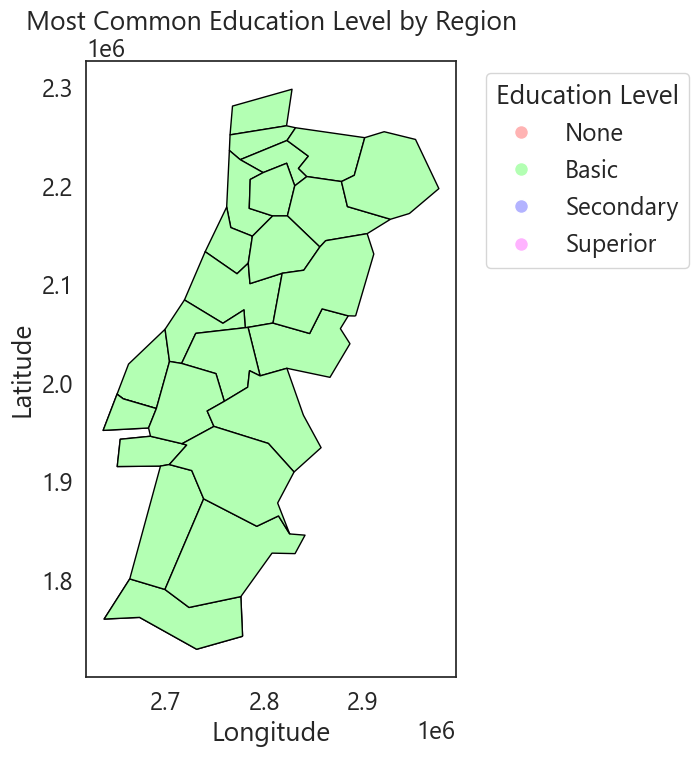

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

education_columns = ['Designation', 'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Assuming df_merged contains the merged data and has education columns
df_grouped = df_merged.groupby('Designation')[education_columns].sum()

df_long = pd.melt(df_merged, id_vars=['year', 'Designation'], 
                  value_vars=['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior'], 
                  var_name='Education_Level', value_name='Population')
print(df_long.head())

# Filter regions in portugal_regions that are present in df_long
regions_to_plot = df_long['Designation'].unique()
portugal_regions = gpd.read_file("NUTS_RG_60M_2013_3035.geojson")
portugal_regions_filtered = portugal_regions[portugal_regions['NUTS_NAME'].isin(regions_to_plot)]

# Merge education data with region boundaries
merged_data = portugal_regions_filtered.merge(df_grouped, left_on='NUTS_NAME', right_index=True)

# Define the dictionary for education level colors
education_colors = {
    'edu_none': '#FFB3B3',     # Pastel Red
    'edu_basic': '#B3FFB3',    # Pastel Green
    'edu_secondary': '#B3B3FF',# Pastel Blue
    'edu_superior': '#FFB3FF'  # Pastel Magenta
}

# Find the most common education level in each region
education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
merged_data['Most_Common_Education'] = merged_data[education_columns].idxmax(axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(ax=ax, color=merged_data['Most_Common_Education'].map(education_colors), edgecolor='black')

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in education_colors.values()]
labels = [level.split('_')[1].title() for level in education_colors.keys()]
ax.legend(handles, labels, title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title('Most Common Education Level by Region')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Summary: No visable correlation between the education levels and the livestock types of each region.

Conclusion: Eduction is not suitable as a socio-economic indicator to see how these types of livestock are related with the geographical patterns. Further research with other indicators is needed.